In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('Data Wranging/OnlineNewsPopularity_Clean.csv').set_index('url')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39469 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timedelta                     39469 non-null  float64
 1   n_tokens_title                39469 non-null  float64
 2   n_tokens_content              39469 non-null  float64
 3   n_unique_tokens               39469 non-null  float64
 4   n_non_stop_words              39469 non-null  float64
 5   n_non_stop_unique_tokens      39469 non-null  float64
 6   num_hrefs                     39469 non-null  float64
 7   num_self_hrefs                39469 non-null  float64
 8   num_imgs                      39469 non-null  float64
 9   num_videos                    39469 non-null  float64
 10  average_token_length          39469 non-null  float64
 11  num_keywords     

In [5]:
data.sort_values('shares',ascending=False).head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,channel,date,title,keywords,weekday
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,554.0,12.0,688.0,0.500734,1.0,0.643357,28.0,3.0,15.0,1.0,...,0.100000,-0.300000,0.400000,0.300000,843300,Tech,2013-07-03,leaked: more low-cost iphone photos,"gadgets, iphone, iphone 5s, iphone rumors, low...",Wed
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,633.0,11.0,893.0,0.517202,1.0,0.716730,17.0,11.0,0.0,11.0,...,0.000000,0.000000,0.500000,0.000000,690400,Business,2013-04-15,dove experiment aims to change the way you see...,"advertising, business, conversations, dove, ma...",Mon
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,274.0,13.0,2591.0,0.237708,1.0,0.371091,27.0,4.0,1.0,1.0,...,0.535714,0.285714,0.035714,0.285714,663600,Business,2014-04-09,startup stories from early hires,"business, jobs, small business, startups, bran...",Wed
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,416.0,9.0,134.0,0.689394,1.0,0.851852,1.0,1.0,0.0,2.0,...,0.000000,0.000000,0.500000,0.000000,652900,Entertainment,2013-11-19,kanye west lectures at harvard about creativity,"creativity, entertainment, harvard, kanye, kan...",Tue
http://mashable.com/2013/03/02/wealth-inequality/,677.0,11.0,382.0,0.487805,1.0,0.605809,15.0,3.0,11.0,1.0,...,0.000000,0.000000,0.500000,0.000000,617900,Other,2013-03-02,viral video shows the extent of u.s. wealth in...,"conversations, politics, u.s., video, videos, ...",Weekend
http://mashable.com/2013/11/12/roomba-880-review/,422.0,8.0,261.0,0.571429,1.0,0.595628,24.0,5.0,18.0,1.0,...,0.000000,0.000000,0.500000,0.000000,441000,Tech,2013-11-12,"roomba 880 has more sucking power, trouble wit...","gadgets, home, irobot, reviews, robot, tech, v...",Tue
http://mashable.com/2014/01/14/australia-heatwave-photos/,359.0,9.0,192.0,0.647368,1.0,0.754098,7.0,4.0,0.0,2.0,...,0.454545,0.136364,0.045455,0.136364,310800,World,2014-01-14,it's hot as hell in australia right now,"australia, photography, world, climate",Tue
http://mashable.com/2013/03/28/blackberry-1-million/,651.0,10.0,905.0,0.460067,1.0,0.645161,3.0,2.0,21.0,0.0,...,0.000000,0.000000,0.500000,0.000000,306100,Business,2013-03-28,blackberry sold 1 million blackberry 10 smartp...,"blackberry, blackberry 10, business, mobile",Thu
http://mashable.com/2013/11/14/ibm-watson-brief/,420.0,12.0,198.0,0.556122,1.0,0.634921,15.0,1.0,14.0,1.0,...,0.700000,-0.450000,0.200000,0.450000,298400,Tech,2013-11-14,ibm brings watson to the masses and other news...,"apple, first to know, gadgets, mobile, tech, w...",Thu


# Distributions
Plotted the distribution of the different columns.

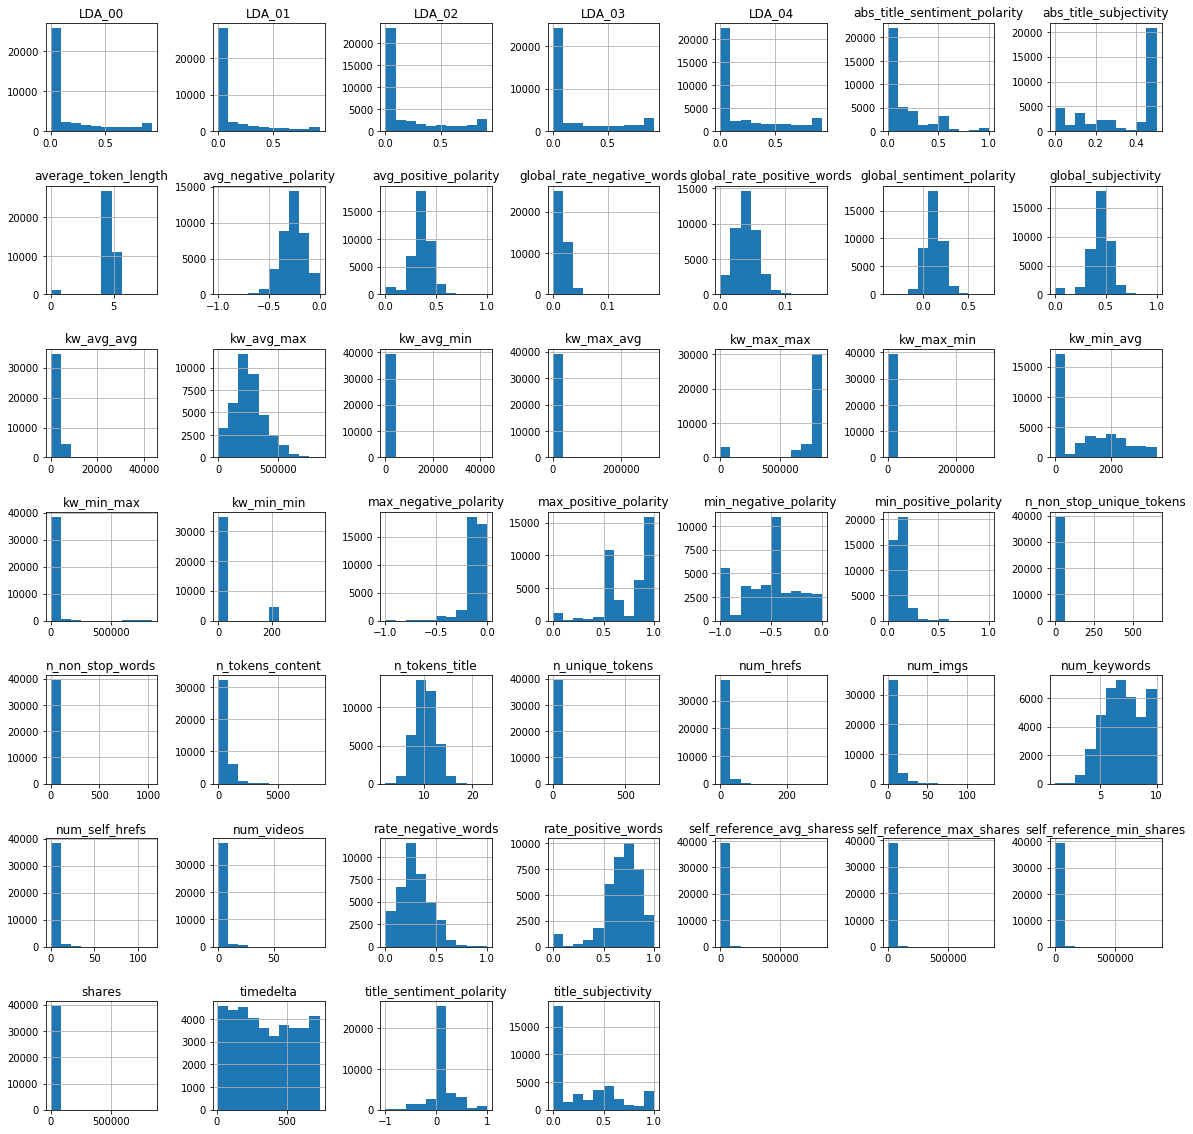

In [6]:
data.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5,wspace=0.5);

Since alot of these distributions rely on the shares, alot of them have the same outlier problem from viral articles. Of the other columns we can gather that Mashables articles

- Tend to be on the positive side and somewhat subjective
- Tend to have 10 word article titles that are rather subjective
- Have an average word length of five letters

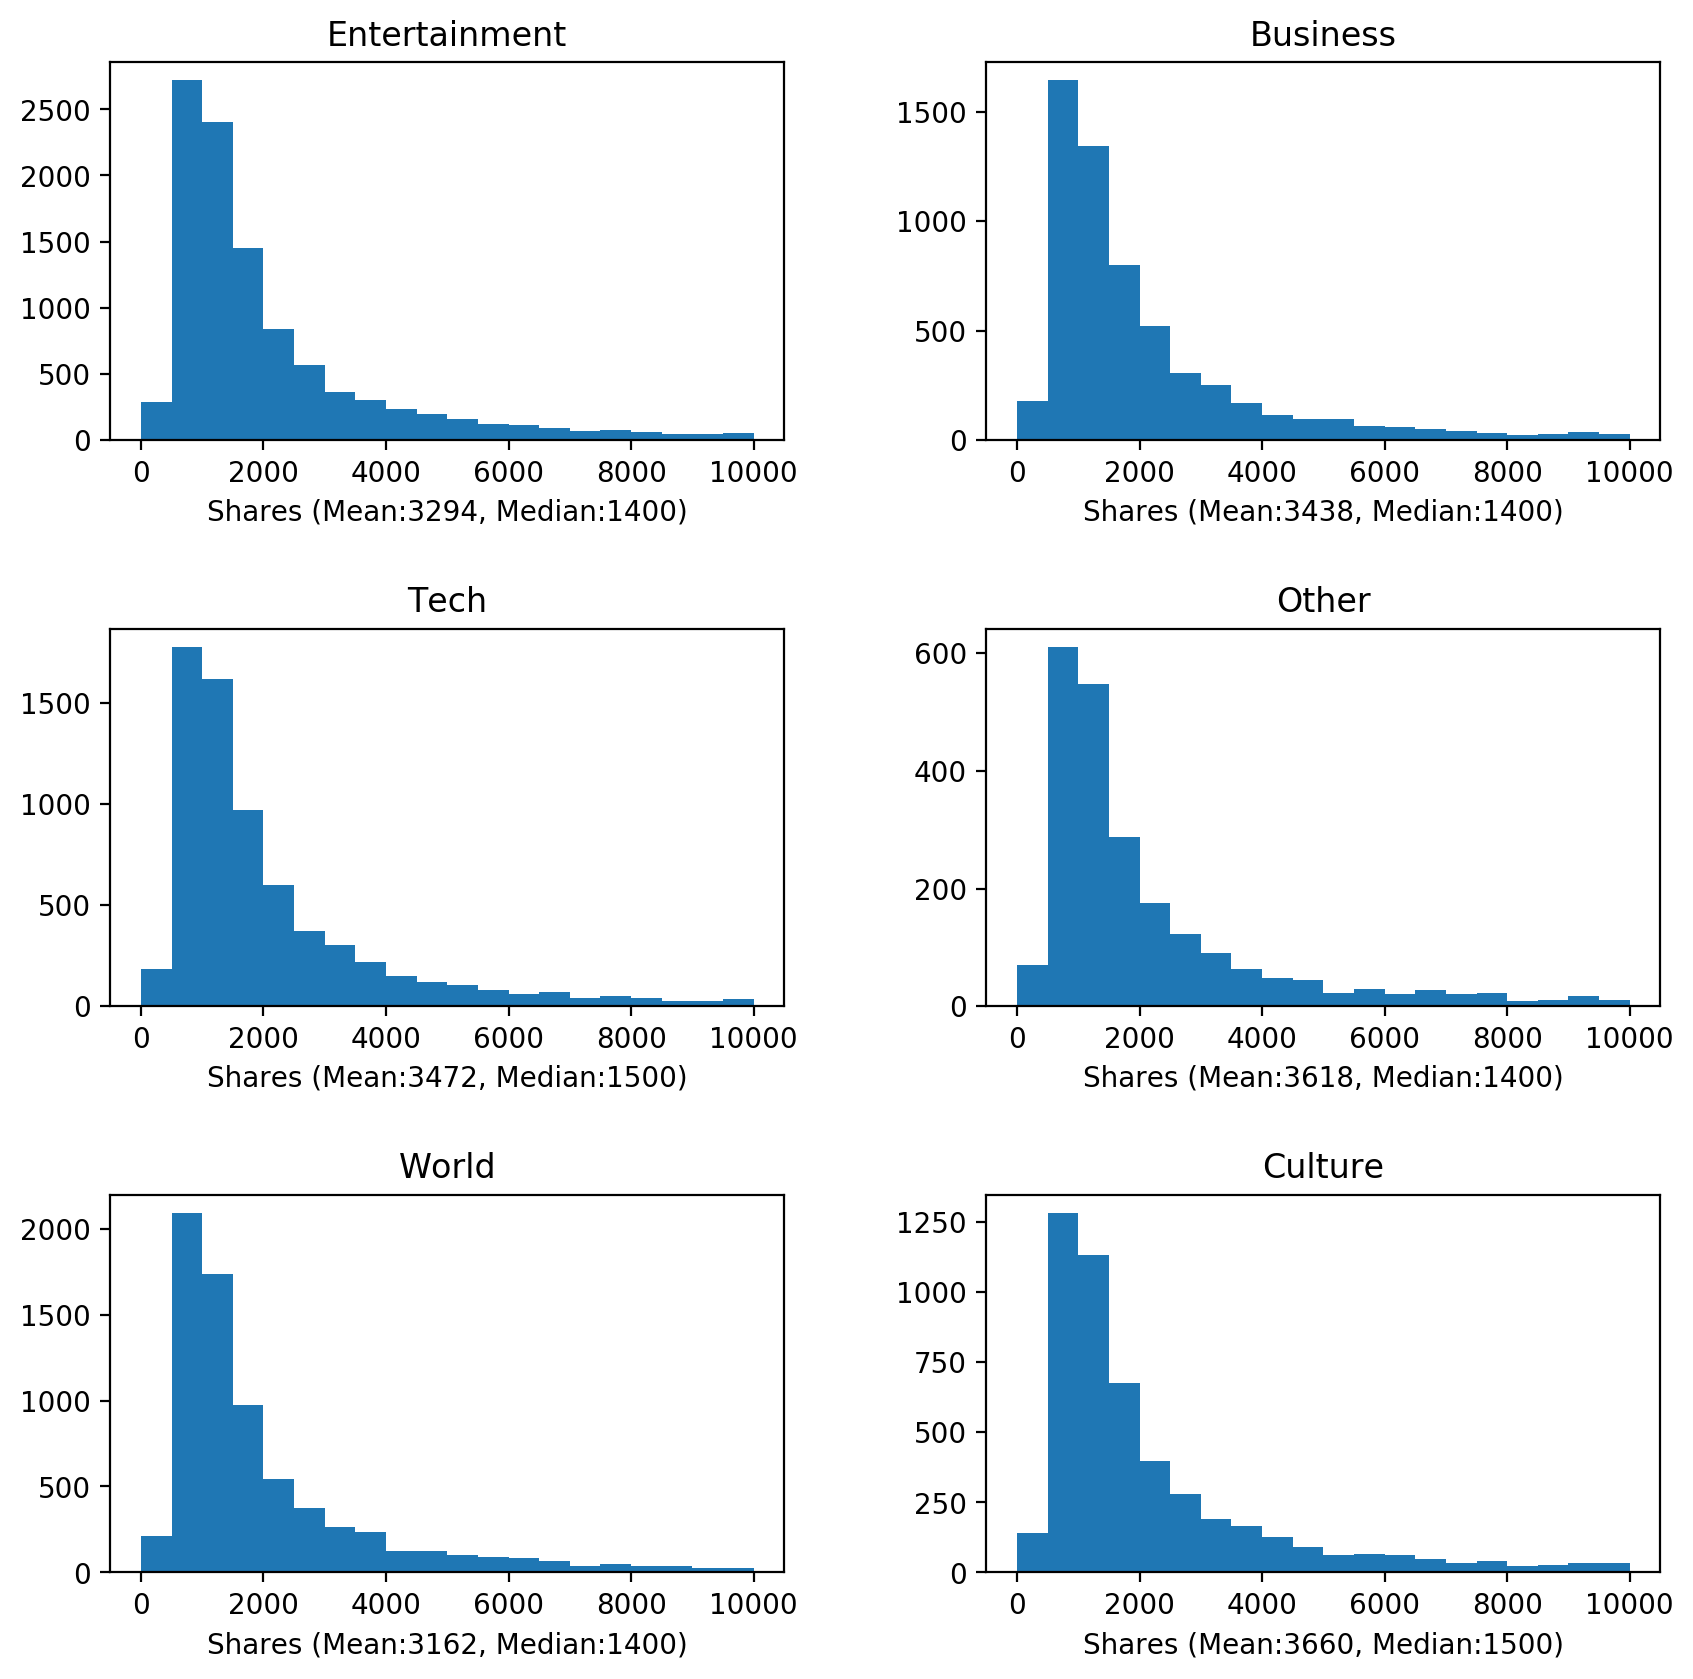

In [7]:
def plot_hist(data,col,x,y,rangemax=None):
    '''
    Plots a histogram for each entry in a specified column
    Allows for a max range to be selected.
    '''
        
    if rangemax == None:
        switch = True
    else:
        switch = False
        
    plt.figure(figsize=(10,10),dpi=200)
    plt.subplots_adjust(hspace=.5,wspace=.3)
    
    for index,entry in enumerate(data[col].unique(),1):
        shares = data[data[col]==entry]["shares"]
        
        if switch == True:
            rangemax=shares.max()
        
        plt.subplot(int(str(y)+str(x)+str(index)))
        plt.hist(shares,bins=20,range=(0,rangemax))
        plt.title(str(entry))
        label = ('Shares (Mean:%d, Median:%d)' % (shares.mean(),shares.median()))
        plt.xlabel(label)
        
plot_hist(data,'channel',2,3,rangemax=10000)  

So it seems a great majority of articles only get around 1500 shares. It doesn't look like theres much of a difference between the data channels

# Week Break Down

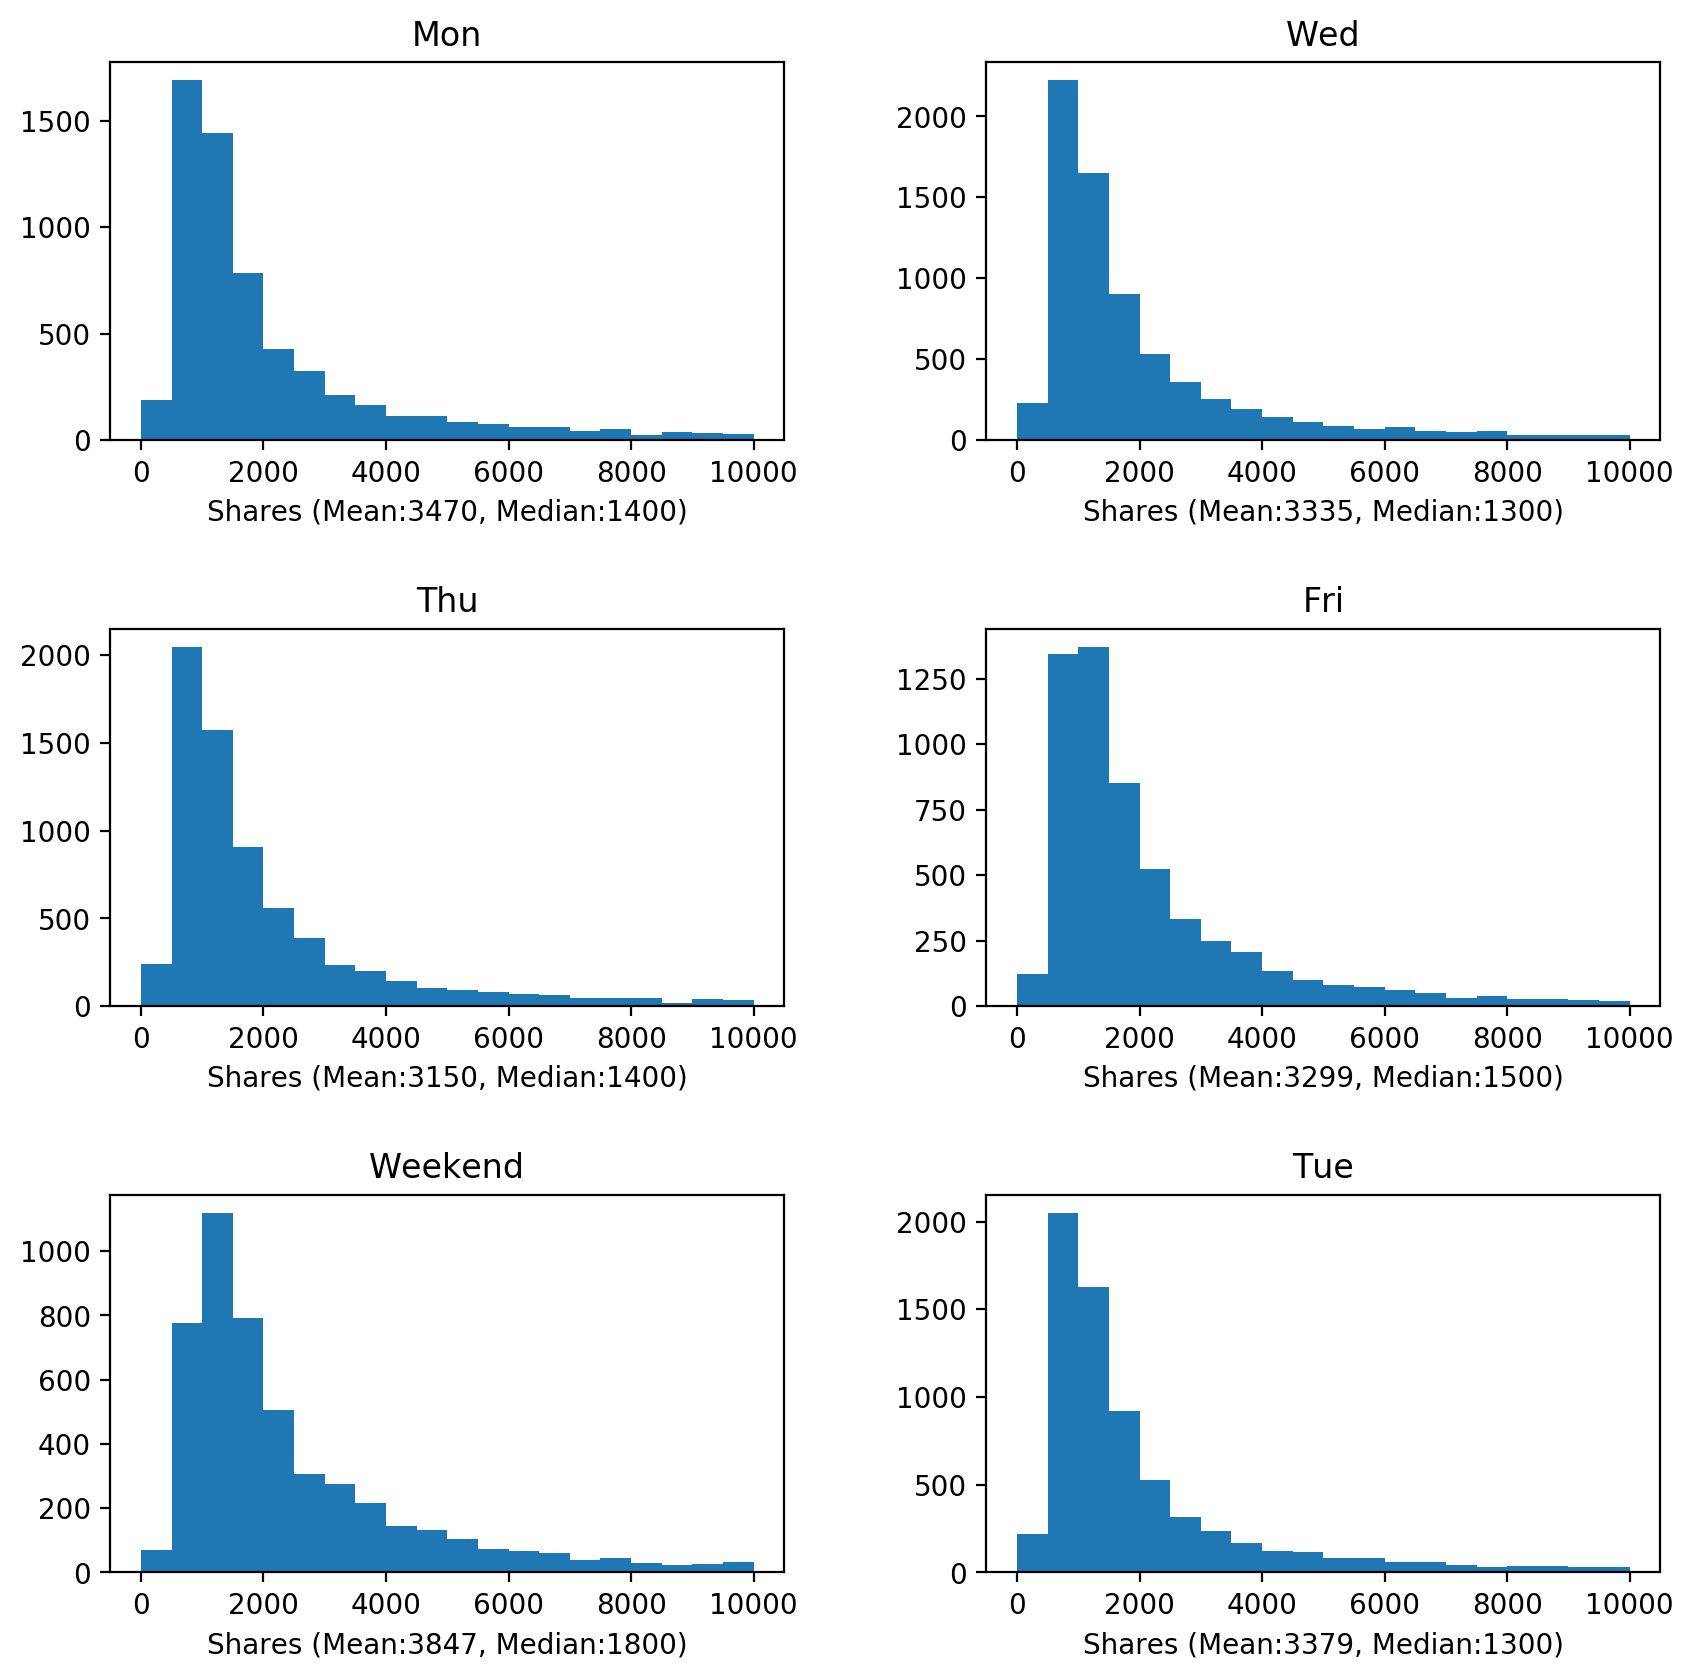

In [8]:
plot_hist(data,'weekday',2,3,rangemax=10000)  

Despite having less articles, those published on the weekend seem to have both a higher mean and median. 

# Dates
Lets see what Mashable's articles shares look like over the months.

So it seems that in 2014 mashable started publishing more articles. Despite this, the median shares has fallen by around 200 shares per article. Could there be a difference in the articles that make those published in the past more popular? Or could it be that articles shares grow gradually over the months and newer ones just lack shares due to age?

Another interesting thing is that weeks where a viral article is published are often followed by a dip in median shares for articles published a week afterwards.

# The Top
Lets take a look at these viral articles

In [9]:
viral_articles = data[data.shares >= 100000]
viral_articles.sort_values('shares',ascending=False).head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,channel,date,title,keywords,weekday
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,554.0,12.0,688.0,0.500734,1.0,0.643357,28.0,3.0,15.0,1.0,...,0.100000,-0.300000,0.400000,0.300000,843300,Tech,2013-07-03,leaked: more low-cost iphone photos,"gadgets, iphone, iphone 5s, iphone rumors, low...",Wed
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,633.0,11.0,893.0,0.517202,1.0,0.716730,17.0,11.0,0.0,11.0,...,0.000000,0.000000,0.500000,0.000000,690400,Business,2013-04-15,dove experiment aims to change the way you see...,"advertising, business, conversations, dove, ma...",Mon
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,274.0,13.0,2591.0,0.237708,1.0,0.371091,27.0,4.0,1.0,1.0,...,0.535714,0.285714,0.035714,0.285714,663600,Business,2014-04-09,startup stories from early hires,"business, jobs, small business, startups, bran...",Wed
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,416.0,9.0,134.0,0.689394,1.0,0.851852,1.0,1.0,0.0,2.0,...,0.000000,0.000000,0.500000,0.000000,652900,Entertainment,2013-11-19,kanye west lectures at harvard about creativity,"creativity, entertainment, harvard, kanye, kan...",Tue
http://mashable.com/2013/03/02/wealth-inequality/,677.0,11.0,382.0,0.487805,1.0,0.605809,15.0,3.0,11.0,1.0,...,0.000000,0.000000,0.500000,0.000000,617900,Other,2013-03-02,viral video shows the extent of u.s. wealth in...,"conversations, politics, u.s., video, videos, ...",Weekend


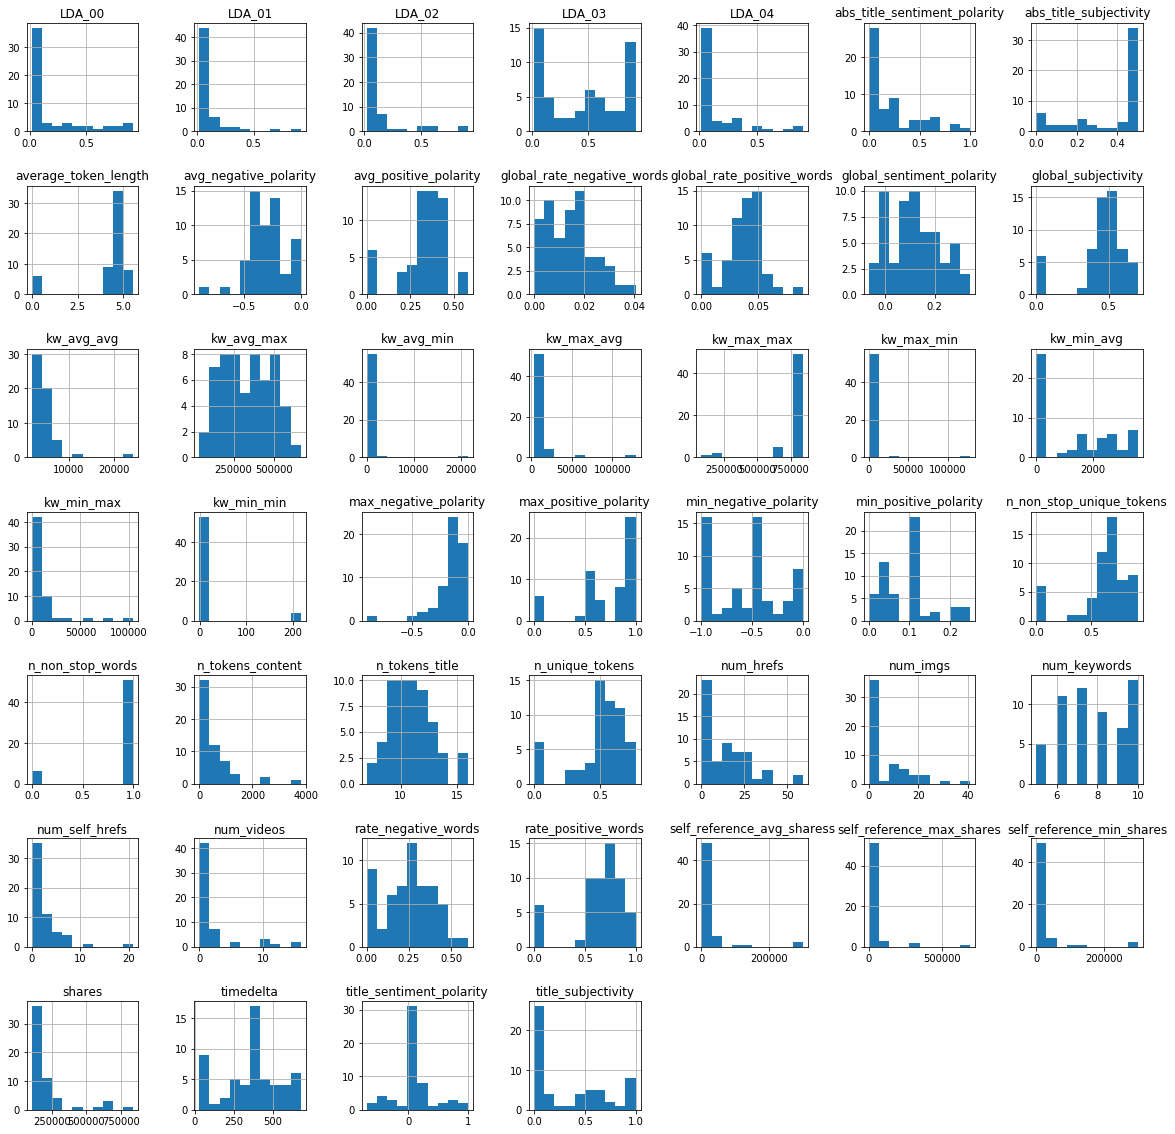

In [10]:
viral_articles.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5,wspace=0.5);

compared to the distribution of all entries, the only column that looks signifigantly different is LDA_03 meaning that some, but not all of the higher shared articles seem to coalign with the third most common LDA topic.

Theres an interesting line present here but its not strong enough to suggest that closness to LDA topic 3 is correlated with higher shares

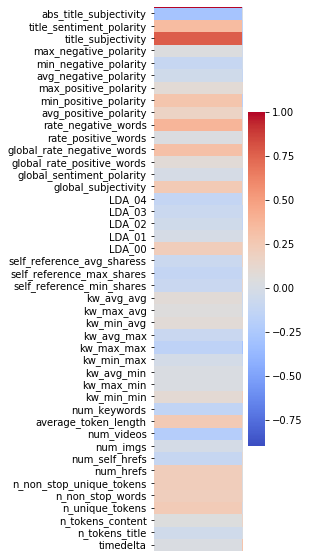

In [11]:
plt.figure(figsize=(2,10))
sns.heatmap(viral_articles.corr(),cmap='coolwarm')
plt.xlim(44,45)
plt.ylim(0,44);

No strong correlations but it does seem that kw_min_min is the highest. This would mean that the higher the lowest shared article in the lowest performing associated keyword is, the more likely an article will have higher shares. On the other hand kw_max_max has the highest negative correlation, meaning that being associated with a well performing keyword might have its drawbacks. 

Other correlations suggest that the length of the content as well as title sentiment and subjectivity might play a small role in the amount of shares

# Keywords

In [12]:
keywords = data.keywords.dropna().str.split(', ')
keywords.head()

url
http://mashable.com/2013/01/07/amazon-instant-video-browser/                  [amazon, entertainment, media, video]
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/                              [business, media, twitter]
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/    [apple, apps, apps and software, business, mob...
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/           [space, college football, entertainment, sports]
http://mashable.com/2013/01/07/att-u-verse-apps/                         [apps, apps and software, at&t, ces, tech]
Name: keywords, dtype: object

In [ ]:
# Split list of keywords into individual entries

keyword_df = pd.DataFrame(columns=['url','keyword'])

for index in keywords.index:
    for key in keywords.loc[index]:
        keyword_df = keyword_df.append(pd.DataFrame({'url':[index],'keyword':[key]}))

In [11]:
keyword_filter = keyword_df.keyword.value_counts()[keyword_df.keyword.value_counts() > 1].index

keyword_df = keyword_df.set_index('keyword').loc[keyword_filter].reset_index()

keyword_shares = keyword_df.join(data.shares).set_index('url')

keyword_shares

# Save Modeling Data

In [14]:
model_data = pd.get_dummies(data, columns=['channel','weekday'])

# drop the dates, we won't need them for modeling
model_data = model_data.drop(columns=['date','title','keyword'])
model_data.to_csv('OnlineNewsPopularity_ForModeling.csv')

model_data.info()

KeyError: "['keyword'] not found in axis"